In [1]:
import numpy as np
import math
from scipy.optimize import *
import matplotlib.pyplot as plt
import scipy

[[-1.42500000e+00  3.63875000e+01]
 [-2.50000000e-03 -6.37916667e-01]]
[1.09980377e+01 1.08951063e-01 3.08404989e-03]
qin of laser is:
47.20510331906346j
qout of telescope is:
(-36.29146593535718+112.1621866398889j)
waist, radius out of telescope is:
[0.04996557385079408, -382.93924627714773]
min waist out of telescope is:
0.047539012087521676


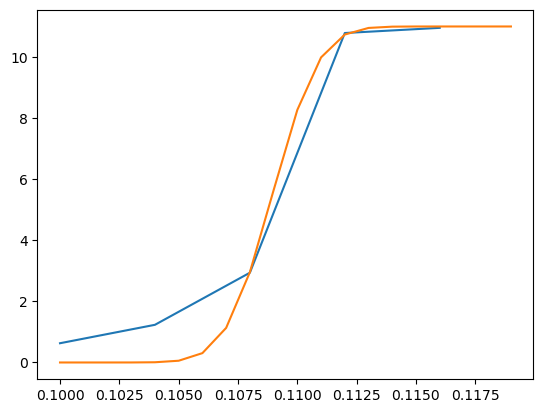

In [53]:
#in centimeters
wavelength = 633*(10**-7)

# Use this function to curvefit for power as a function of x to calculate w(z)
# IMPORTANT remmeber power is proportional to voltage measured on the oscilloscope
def power_as_func_of_x(x, amp, x0, waist):
    return (amp/2)*(1 + scipy.special.erf(np.sqrt(2)*(x-x0)/waist))

# Use this function to curvefit for waist as a function of z to calculate w0
# IMPORTANT, the parameters are in cm
def waist_as_func_of_z(z, w0, z0, b):
    return w0*np.sqrt(1+(((z-z0)**2)/(b**2)))

#alternate in terms of b
def waist_as_func_of_z_alt(z, z0, b):
    return b*np.sqrt(1+(((z-z0)**2)/(b**2)))/(np.pi) * wavelength

#calculate q for R and w
def calculate_q(radius_of_curvature,waist):
    return 1/(1/radius_of_curvature - 1j*wavelength/(np.pi*waist*waist))

#calculate R and w from q
def calculate_waist_radius_from_q(q_parameter):
    if(np.real(q_parameter) == 0):
        return [np.sqrt(-1*wavelength/(np.pi*np.imag(1/q_parameter) )),99999999999]
    else:
        return [np.sqrt(-1*wavelength/(np.pi*np.imag(1/q_parameter) )),1/np.real(1/q_parameter)]
# returns output q for input q and abcd
def calculate_q_out(qin, abcd):
    return (abcd[0][0]*qin + abcd[0][1])/(abcd[1][0]*qin + abcd[1][1])

#calculate q from w, R is infiniy
def calculate_q_from_waist(waist):
    return 1j*np.pi*waist*waist/wavelength




# ABCD parameters 
#length in cm
def abcd_free_space(length):
    return [1,length],[0,1]

#focal length in cm
def abcd_lens(focal_length):
    return ([1,0],[(-1/focal_length),1])

#f and length in cm
def abcd_telescope(f_eye, f_obj, length):
    #print(abcd_lens(f_eye)@ abcd_free_space(length)@ abcd_lens(f_obj))
    array =  ((np.array(abcd_lens(f_eye))@ np.array(abcd_free_space(length)) @np.array(abcd_lens(f_obj))))
    #print(array)
    return array.tolist()

#print(np.array(abcd_free_space(30))@np.array(abcd_free_space(10)))
#print(abcd_telescope(30,20,48.5))
abcd_total = np.array(abcd_telescope(30,20,48.5))@np.array(abcd_free_space(8.5))
print(abcd_total)

#print(abcd_total)



# curve fitting

x_val = [0.1, 0.104, 0.108, 0.112, 0.116]
volt_val = [0.630, 1.233, 2.938, 10.784, 10.953]



guess_power_x = []  #[amp, x0, waist]; x0 is the centre of beam

####### UNCOMMENT  #######
plt.plot(x_val,volt_val)
popt0,pcov0 = curve_fit(power_as_func_of_x,x_val,volt_val)

#print(popt0)
dummy_x = np.arange(0.1,0.12,0.001)
plt.plot(dummy_x,power_as_func_of_x(dummy_x,*popt0))


print(popt0)

z_val = []
waist_val = []

guess_waist_as_func_of_z = []   # [w0 , z0, b] in cm

#plt.plot(z_val,waist_val)
#popt1,pcov1 = curve_fit(waist_as_func_of_z,z_val,waist_val,guess_waist_as_func_of_z)
#plt.plot(z_val,waist_as_func_of_z(z_val,*popt1))


qin = calculate_q_from_waist(0.0308404989)
print("qin of laser is:")
print(qin)

qout_telescope = calculate_q_out(qin,abcd_total)


print("qout of telescope is:")
print(qout_telescope)

waist_telecope = calculate_waist_radius_from_q(qout_telescope)

print("waist, radius out of telescope is:")
print(waist_telecope)

waist_min = calculate_waist_radius_from_q(112.1621866398889j)[0]
print("min waist out of telescope is:")
print(waist_min)
